<a href="https://colab.research.google.com/github/XMVII/CV/blob/main/CV_Assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

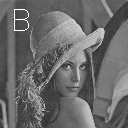

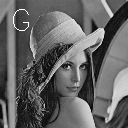

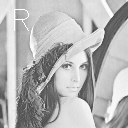

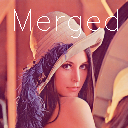

In [39]:
# @title Q1. 1개의 RGB image를 3개의 channel(R, G, B)로 분리한 뒤, 다시 합치는 프로그램을 작성하시오.

import cv2
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

# 이미지 로드
img = cv2.imread("/content/drive/MyDrive/CV_Practice_Images/lena.jpg")

# 이미지를 B, G, R 채널로 분리
b, g, r = cv2.split(img) # cv2.split()은 image를 B, G, R 순서로 분리한다.
b = cv2.resize(b, dsize=(128, 128))
g = cv2.resize(g, dsize=(128, 128))
r = cv2.resize(r, dsize=(128, 128))

# 분리된 채널들을 합쳐서 RGB 이미지 생성
merged_img = cv2.merge((b, g, r))
merged_img = cv2.resize(merged_img, dsize=(128, 128))

# 이미지 출력
cv2.putText(b, "B", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1)
cv2.putText(g, "G", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1)
cv2.putText(r, "R", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1)
cv2.putText(merged_img, "Merged", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1)

cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)
cv2_imshow(merged_img)

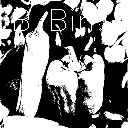

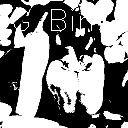

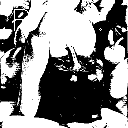

In [46]:
# @title Q2 - 1. R, G, B 각 channel별로 global threshold를 구하시오.

import cv2
import numpy as np

from google.colab.patches import cv2_imshow

image = cv2.imread("/content/drive/MyDrive/CV_Practice_Images/peppers.jpg")

b, g, r = cv2.split(image)

# R, G, B 채널에서 threshold 추출
r_threshold, r_binary = cv2.threshold(r, np.mean(r), 255, cv2.THRESH_BINARY)
g_threshold, g_binary = cv2.threshold(g, np.mean(g), 255, cv2.THRESH_BINARY)
b_threshold, b_binary = cv2.threshold(b, np.mean(b), 255, cv2.THRESH_BINARY)

# 결과 출력
b_binary = cv2.resize(b_binary, dsize=(128, 128))
g_binary = cv2.resize(g_binary, dsize=(128, 128))
r_binary = cv2.resize(r_binary, dsize=(128, 128))

cv2.putText(b_binary, "B Bin.", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1)
cv2.putText(g_binary, "G Bin.", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1)
cv2.putText(r_binary, "R Bin.", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1)

cv2_imshow(b_binary)
cv2_imshow(g_binary)
cv2_imshow(r_binary)

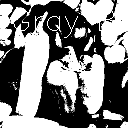

In [48]:
# @title Q2 - 2. Gray scale로 변환한 후 global threshold를 구하시오.

import cv2
import numpy as np

from google.colab.patches import cv2_imshow

image = cv2.imread("/content/drive/MyDrive/CV_Practice_Images/peppers.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Gray scale image에서 global threshold 추출
threshold, binary = cv2.threshold(image, np.mean(image), 255, cv2.THRESH_BINARY)

# 결과 출력
binary = cv2.resize(binary, dsize=(128, 128))

cv2.putText(binary, "Gray Bin.", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1)

cv2_imshow(binary)

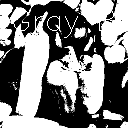

In [13]:
# @title Q2 - 3. Q2 - 2에서 얻은 global threshold를 기준으로 영상을 이진화하시오.

import cv2
import numpy as np

from google.colab.patches import cv2_imshow

image = cv2.imread("/content/drive/MyDrive/CV_Practice_Images/peppers.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Gray scale image에서 global threshold 추출
threshold, binary = cv2.threshold(image, np.mean(image), 255, cv2.THRESH_BINARY)

# Q2 - 2의 global threshold를 기준으로 영상 이진화
threshold2, binary2 = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

binary2 = cv2.resize(binary2, dsize=(128, 128))

cv2.putText(binary2, "Gray Bin.", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1)

cv2_imshow(binary2)

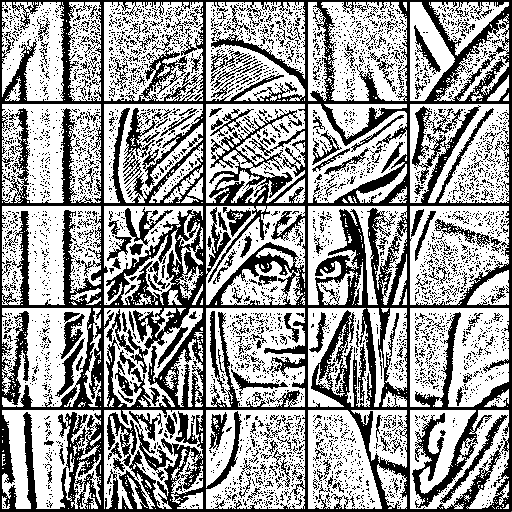

In [11]:
# @title Q3 - 1. Image의 block 개수를 25개로 나눈 후, adaptive threshold를 구하시오.

import cv2
import numpy as np

from google.colab.patches import cv2_imshow

img = cv2.imread("/content/drive/MyDrive/CV_Practice_Images/lena.jpg", cv2.IMREAD_GRAYSCALE)
height, width = img.shape[:2]
row_size = height//5
col_size = width//5

for i in range(5):
    for j in range(5):
        # 해당 블록 좌표 계산
        start_row = i * row_size
        end_row = start_row + row_size
        start_col = j * col_size
        end_col = start_col + col_size
        
        # 블록 추출
        block = img[start_row:end_row, start_col:end_col]
        
        # 블록 이진화
        block = cv2.adaptiveThreshold(block, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
        
        # 블록 위치 지정
        x = j * col_size
        y = i * row_size
        
        # 블록 삽입
        img[y:y+row_size, x:x+col_size] = block

        # 블록 테두리 표시
        cv2.rectangle(img, (x, y), (x+col_size, y+row_size), (0, 0, 255), 2)

cv2_imshow(img)


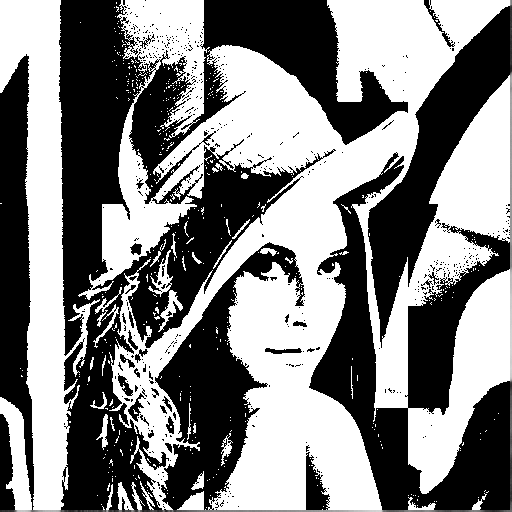

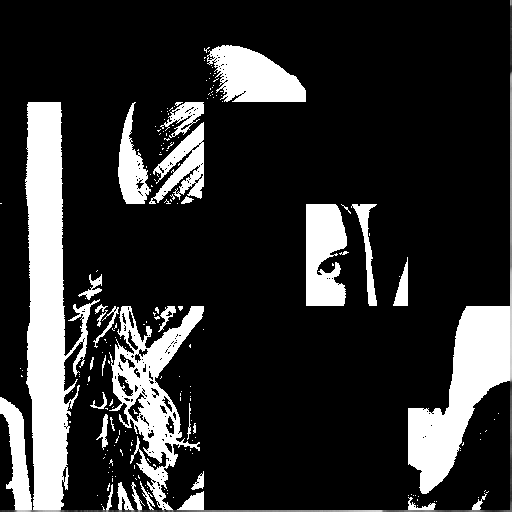

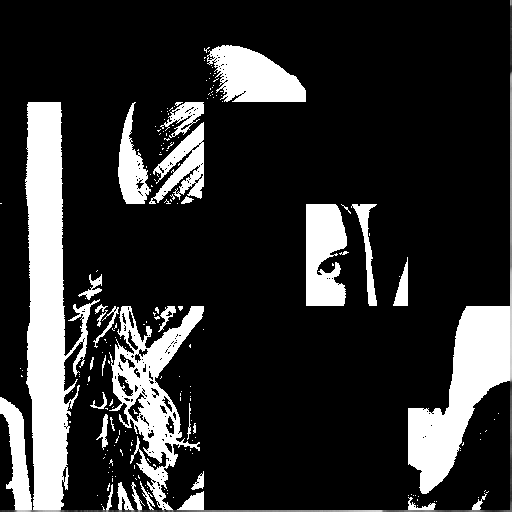

In [29]:
# @title Q3 - 2. Adaptive threshold를 구한 결과(평균값, 중간값, 최대와 최소의 평균값)을 기준으로 각 block을 이진화하여 결과를 나타내시오.

import cv2
import numpy as np

from google.colab.patches import cv2_imshow

img = cv2.imread("/content/drive/MyDrive/CV_Practice_Images/lena.jpg", cv2.IMREAD_GRAYSCALE)
height, width = img.shape[:2]
row_size = height // 5
col_size = width // 5

# 평균값 이진화
for i in range(5):
    for j in range(5):
        start_row = i * row_size
        end_row = start_row + row_size
        start_col = j * col_size
        end_col = start_col + col_size
        
        block = img[start_row:end_row, start_col:end_col]
        
        mean_value = np.mean(block)
        block = cv2.threshold(block, mean_value, 255, cv2.THRESH_BINARY)[1]
        
        x = j * col_size
        y = i * row_size
        
        img[y:y+row_size, x:x+col_size] = block

img = cv2.resize(img, dsize=(512,512))

cv2_imshow(img)

# 중간값 이진화
for i in range(5):
    for j in range(5):
        start_row = i * row_size
        end_row = start_row + row_size
        start_col = j * col_size
        end_col = start_col + col_size
        
        block = img[start_row:end_row, start_col:end_col]
        
        median_value = np.median(block)
        block = cv2.threshold(block, median_value, 255, cv2.THRESH_BINARY)[1]
        
        x = j * col_size
        y = i * row_size
        
        img[y:y+row_size, x:x+col_size] = block

img = cv2.resize(img, dsize=(512,512))

cv2_imshow(img)

# 최대와 최소의 평균값값
for i in range(5):
    for j in range(5):
        start_row = i * row_size
        end_row = start_row + row_size
        start_col = j * col_size
        end_col = start_col + col_size
        
        block = img[start_row:end_row, start_col:end_col]
        
        average_value = (np.max(block) + np.min(block)) / 2
        block = cv2.threshold(block, average_value, 255, cv2.THRESH_BINARY)[1]
        
        x = j * col_size
        y = i * row_size
        
        img[y:y+row_size, x:x+col_size] = block

img = cv2.resize(img, dsize=(512,512))

cv2_imshow(img)

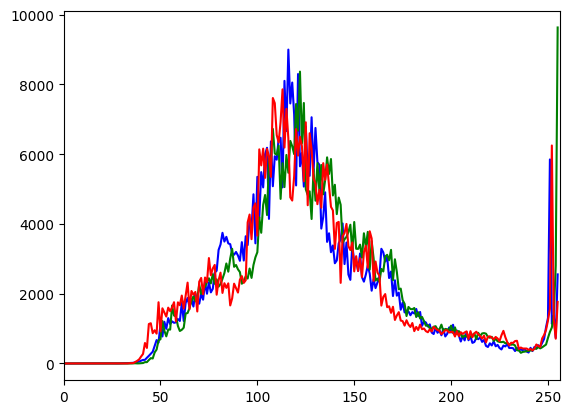

In [30]:
# @title Q4 - 1. R, G, B 각 channel별 histogram 분포를 나타내시오.

import cv2
import numpy as np

from matplotlib import pyplot as plt

# 이미지 파일 읽기
img = cv2.imread("/content/drive/MyDrive/CV_Practice_Images/MOT16-1.png")

# B, G, R 채널로 분리
b, g, r = cv2.split(img)

# 히스토그램 계산
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# 그래프 출력
plt.plot(hist_b, color='b')
plt.plot(hist_g, color='g')
plt.plot(hist_r, color='r')
plt.xlim([0, 256])
plt.show()


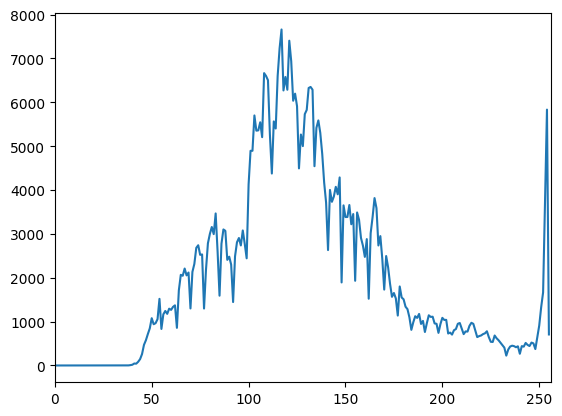

In [9]:
# @title Q4 - 2. Gray scale로 변환한 후 histogram 분포를 나타내시오.

import cv2
import numpy as np

from matplotlib import pyplot as plt

# 이미지 파일 읽기
img = cv2.imread("/content/drive/MyDrive/CV_Practice_Images/MOT16-1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 히스토그램 계산
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# 그래프 출력
plt.plot(hist)
plt.xlim([0, 256])
plt.show()


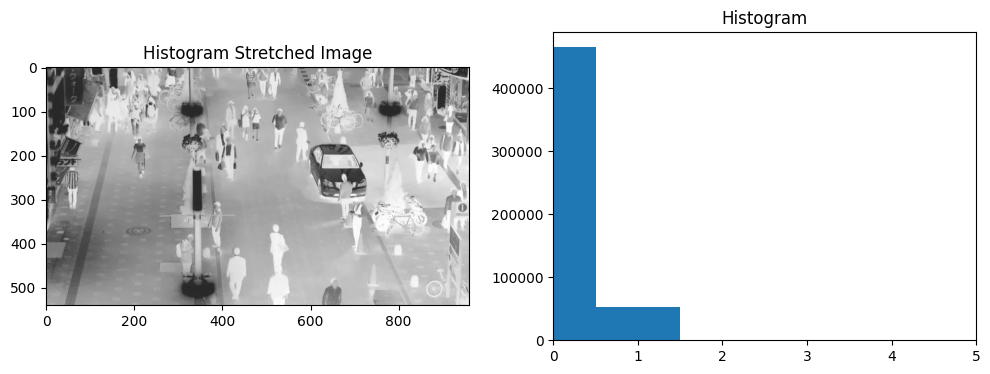

In [7]:
# @title Q4 - 3. Histogram stretching을 적용한 결과의 image와 stretching 적용 후의의

import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지를 grayscale로 읽기
img = cv2.imread("/content/drive/MyDrive/CV_Practice_Images/MOT16-1.png", cv2.IMREAD_GRAYSCALE)

# 히스토그램 스트레칭
img_min = np.min(img)
img_max = np.max(img)
img_stretched = (img - img_min) * 255 / (img_max - img_min)

# 히스토그램 분포 계산
hist, bins = np.histogram(img_stretched.flatten(), 256, [0, 256])

# 결과 이미지와 히스토그램 분포 출력
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].imshow(img_stretched, cmap='gray')
ax[0].set_title('Histogram Stretched Image')
ax[1].bar(bins[:-1], hist, width=1)
ax[1].set_xlim([0, 5])
ax[1].set_title('Histogram')
plt.show()

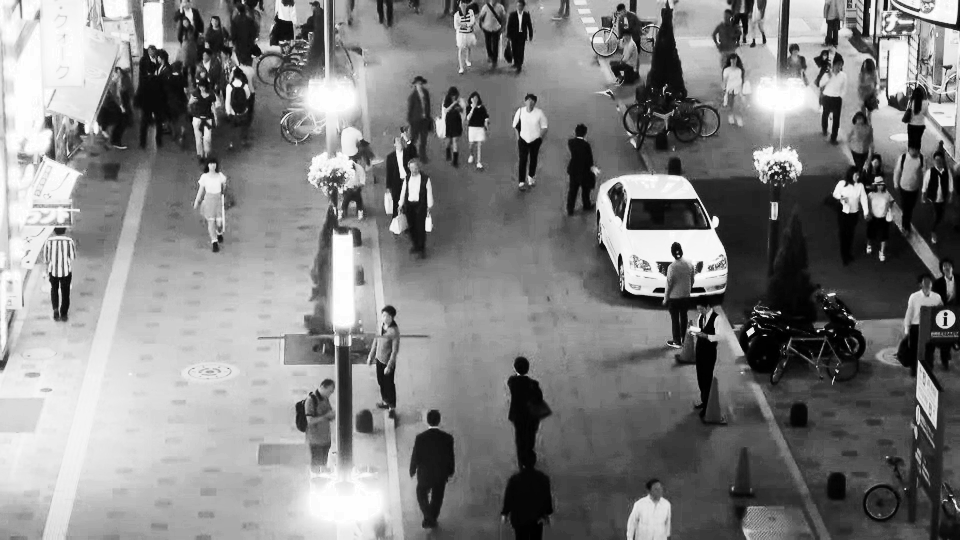

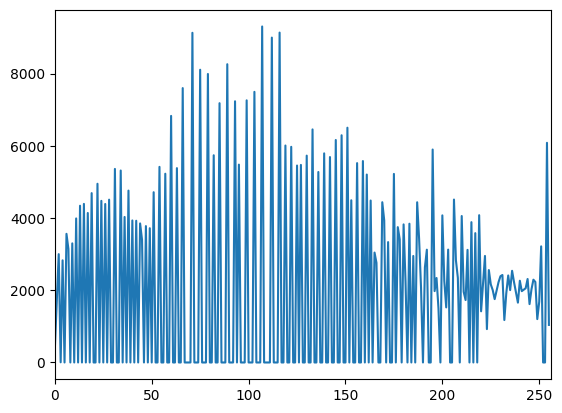

In [12]:
# @title Q4 - 4. Histogram equalization를 적용한 결과의 이미지와 equalization 후의 histogram 분포 graph를 나타내시오.

import cv2
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

# Load a image.
image = cv2.imread("/content/drive/MyDrive/CV_Practice_Images/MOT16-1.png", cv2.IMREAD_GRAYSCALE)

# Equalize the histogram
eq_img = cv2.equalizeHist(image)

cv2_imshow(eq_img)

# Calculate histogram of the equalized image
hist = cv2.calcHist([eq_img], [0], None, [256], [0, 256])

# Show histograms
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

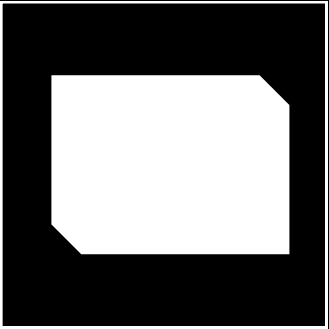

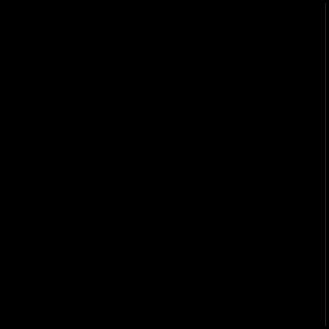

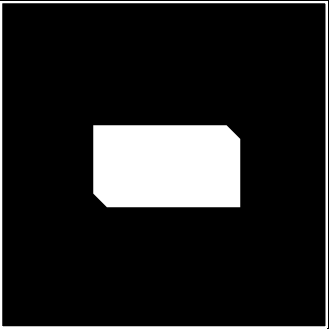

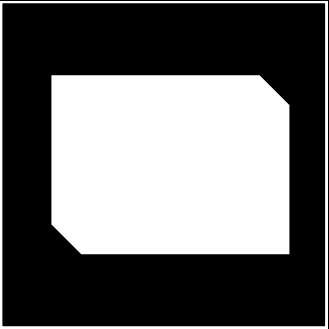

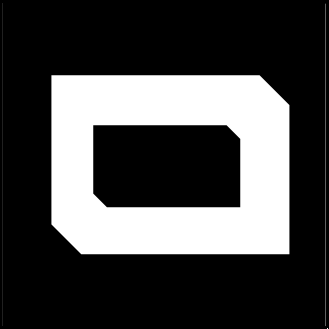

In [15]:
# @title Q5. Copy of Picture1.png와 Copy of Picture2.png를 활용하여 두 image들 간의 덧셈, 뺄셈, AND, OR, XOR 연산의 결과들을 출력하시오.

import cv2

from google.colab.patches import cv2_imshow

# 이미지 읽기
img1 = cv2.imread("/content/drive/MyDrive/CV_Practice_Images/Copy of Picture1.png")
img2 = cv2.imread("/content/drive/MyDrive/CV_Practice_Images/Copy of Picture2.png")

# 이미지 크기 조정
img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

# 덧셈
addition = cv2.add(img1, img2)

# 뺄셈
subtraction = cv2.subtract(img1, img2)

# AND 연산
bitwise_and = cv2.bitwise_and(img1, img2)

# OR 연산
bitwise_or = cv2.bitwise_or(img1, img2)

# XOR 연산
bitwise_xor = cv2.bitwise_xor(img1, img2)

# 결과 이미지 출력
cv2_imshow(addition)
cv2_imshow(subtraction)
cv2_imshow(bitwise_and)
cv2_imshow(bitwise_or)
cv2_imshow(bitwise_xor)